In [37]:
import pandas as pd

from config.paths import EVALUATION

id = 'w5_v3'

# path = EVALUATION / f"{id}_evaluation_results_greedy.csv"
path = EVALUATION / f"{id}_evaluation_results_beam_search.csv"
data = pd.read_csv(path)

In [38]:
len(data)

2923

In [39]:
data['source_length'] = data['source'].apply(lambda x: len(x.split()))
data['reference_length'] = data['reference'].apply(lambda x: len(x.split()))
data['prediction_length'] = data['prediction'].apply(lambda x: len(x.split()))

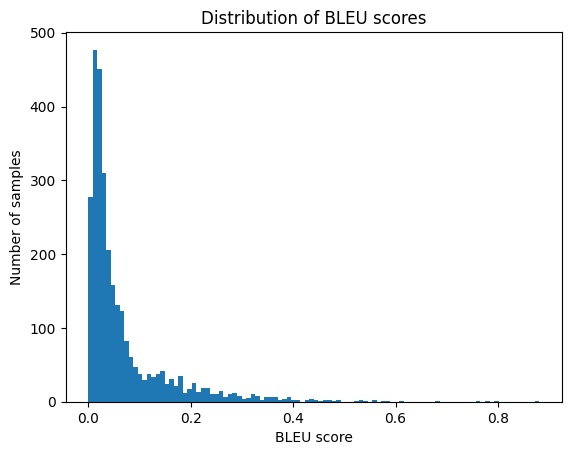

In [40]:
# format: source,prediction,reference,bleu


# plot distribution of bleu scores
import matplotlib.pyplot as plt
plt.hist(data['bleu'], bins=100)
plt.xlabel('BLEU score')
plt.ylabel('Number of samples')
plt.title('Distribution of BLEU scores')
plt.show()

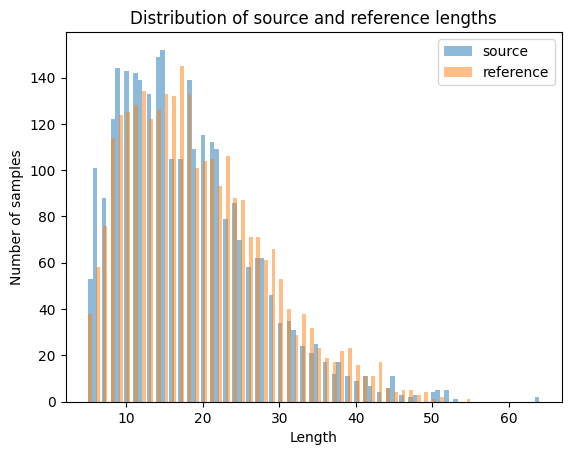

In [41]:
# distribution of source, reference length in one plot

plt.hist(data['source_length'], bins=100, alpha=0.5, label='source')
plt.hist(data['reference_length'], bins=100, alpha=0.5, label='reference')
plt.xlabel('Length')
plt.ylabel('Number of samples')
plt.title('Distribution of source and reference lengths')
plt.legend()
plt.show()



In [42]:
import numpy as np
mean_bleu = np.mean(data['bleu'])
median_bleu = np.median(data['bleu'])
std_bleu = np.std(data['bleu'])
print(f"Mean BLEU: {mean_bleu:.4f}, Median BLEU: {median_bleu:.4f}, Std BLEU: {std_bleu:.4f}")

Mean BLEU: 0.0688, Median BLEU: 0.0332, Std BLEU: 0.0906


In [43]:
# print the top 10 worst predictions and top 10 best predictions

worst_predictions = data.sort_values('bleu').head(10)
best_predictions = data.sort_values('bleu', ascending=False).head(10)

# only print the source, prediction, reference and bleu score in nice format
print("Top 10 worst best_predictions:")
for i, row in best_predictions.iterrows():
    print(f"Source: {row['source']}")
    print(f"Prediction: {row['prediction']}")
    print(f"Reference: {row['reference']}")
    print(f"BLEU: {row['bleu']:.4f}")
    print()

Top 10 worst best_predictions:
Source: aber wenn new york veränderung ist, dann ist es auch neuerfindung.
Prediction: but if new york is change, it is also new-to-date.
Reference: but if new york is change, it is also reinvention.
BLEU: 0.8801

Source: die anschläge am donnerstag und freitag erfolgten wenige tage nach einem umstrittenen referendum über eine von der militärjunta ausgearbeitete verfassung.
Prediction: the attacks on thursday and friday were a few days after a controversial referendum on a constitution drawn up by the military
Reference: the attacks on thursday and friday came just a few days after a controversial referendum on a constitution drawn up by the military junta.
BLEU: 0.7967

Source: die marke ulster bank wird bereits für kunden in der republik irland und nordirland verwendet.
Prediction: the brand bank is already used for customers in the republic of ireland and northern ireland. is
Reference: the ulster bank brand is already used for customers in the republi

In [44]:
print("Top 10 worst predictions:")
for i, row in worst_predictions.iterrows():
    print(f"Source: {row['source']}")
    print(f"Prediction: {row['prediction']}")
    print(f"Reference: {row['reference']}")
    print(f"BLEU: {row['bleu']:.4f}")
    print()

Top 10 worst predictions:
Source: es verändert ein wenig den ausblick.
Prediction: there is little change in the direction. is no
Reference: it alters your outlook a bit.
BLEU: 0.0000

Source: der metereologe alek krautmann sagt, dass beide flüsse viele häuser in den vorortgegenden nahe baton rouge überschwemmen könnten.
Prediction: the minute, mr kraututmann, says that
Reference: forecaster alek krautmann said both rivers could flood many houses in suburban areas near baton rouge.
BLEU: 0.0000

Source: schorndorf: einbrecher mit hubschrauber gesucht
Prediction: schororg: leave to helicopters, thennnnn
Reference: schorndorf: search for intruders made by helicopter
BLEU: 0.0000

Source: auf der speisekarte stehen sandwiches mit speck und käse und es gibt garnierungen wie kapern und sautierte zwiebeln.
Prediction: then, then, then, then, then, then, then,
Reference: bacon-egg-and-cheese sandwiches are on the menu, and toppings like capers and sauted onions are available.
BLEU: 0.0000

So

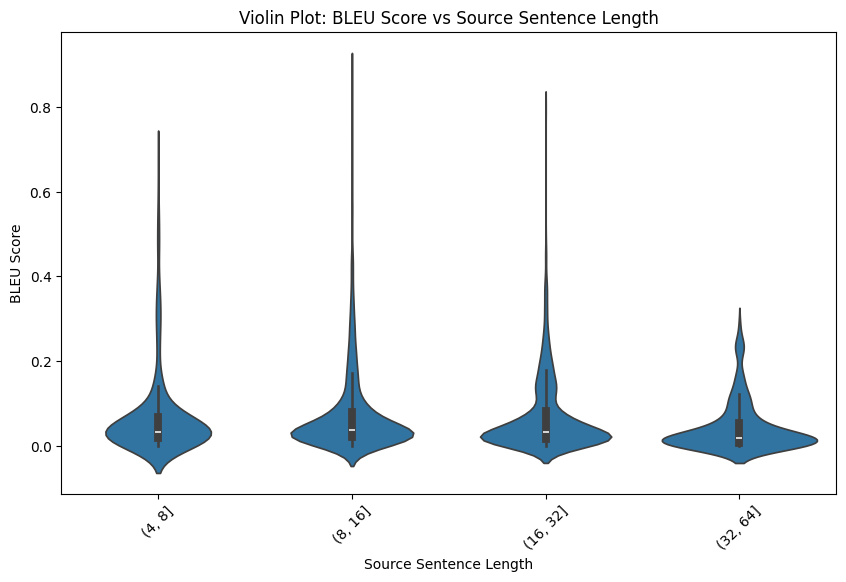

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new column for source length categories
bins = [4, 8, 16, 32, 64]  # Define sentence length ranges
data['source_length_category'] = pd.cut(data['source_length'], bins=bins)

plt.figure(figsize=(10, 6))
sns.violinplot(x='source_length_category', y='bleu', data=data)
plt.xlabel('Source Sentence Length')
plt.ylabel('BLEU Score')
plt.title('Violin Plot: BLEU Score vs Source Sentence Length')
plt.xticks(rotation=45)
plt.show()

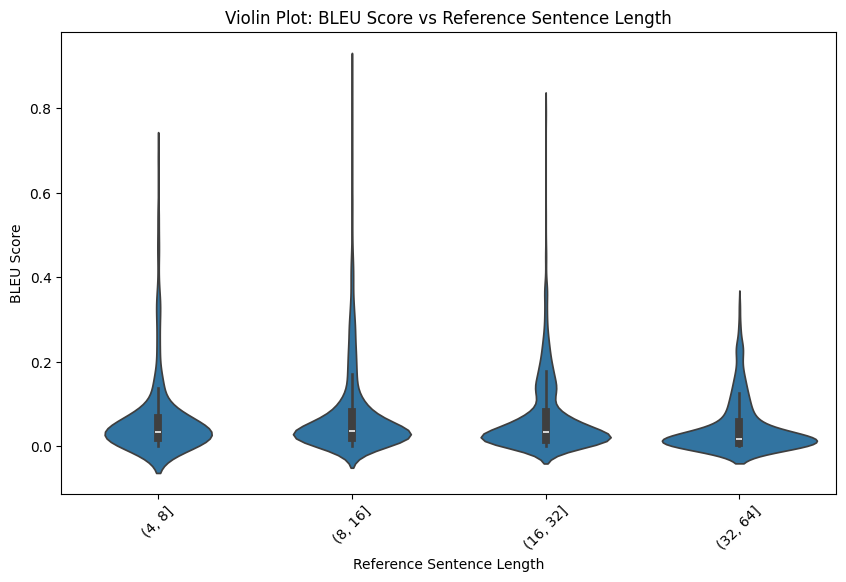

In [46]:
data['reference_length_category'] = pd.cut(data['reference_length'], bins=bins)

plt.figure(figsize=(10, 6))
sns.violinplot(x='reference_length_category', y='bleu', data=data)
plt.xlabel('Reference Sentence Length')
plt.ylabel('BLEU Score')
plt.title('Violin Plot: BLEU Score vs Reference Sentence Length')
plt.xticks(rotation=45)
plt.show()

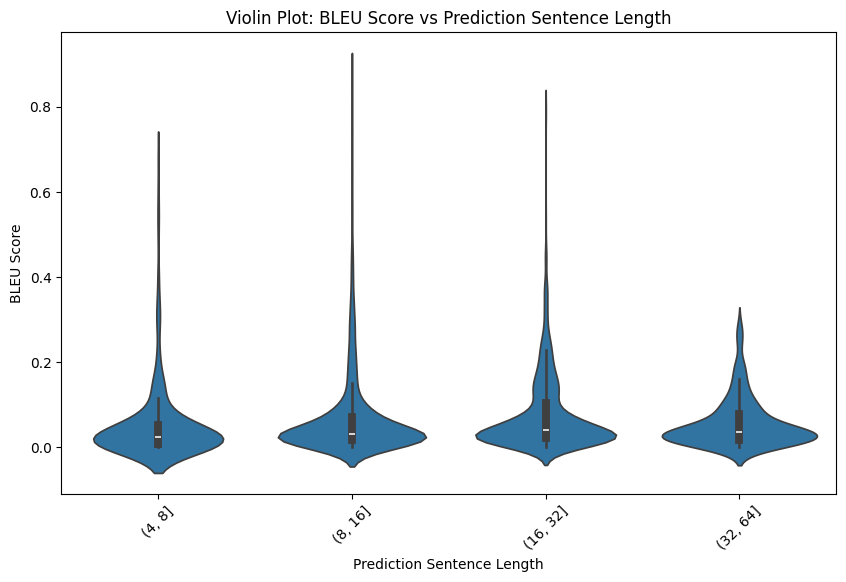

In [47]:
data['prediction_length_category'] = pd.cut(data['prediction_length'], bins=bins)

plt.figure(figsize=(10, 6))
sns.violinplot(x='prediction_length_category', y='bleu', data=data)
plt.xlabel('Prediction Sentence Length')
plt.ylabel('BLEU Score')
plt.title('Violin Plot: BLEU Score vs Prediction Sentence Length')
plt.xticks(rotation=45)
plt.show()

In [48]:
data['length_diff_ref_pred'] = data['reference_length'] - data['prediction_length']

/var/folders/4g/91bm8hl51ld9v8c8tg6_lrqw0000gn/T/ipykernel_38006/2158649481.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='length_diff_category', y='bleu', data=data, palette='muted')


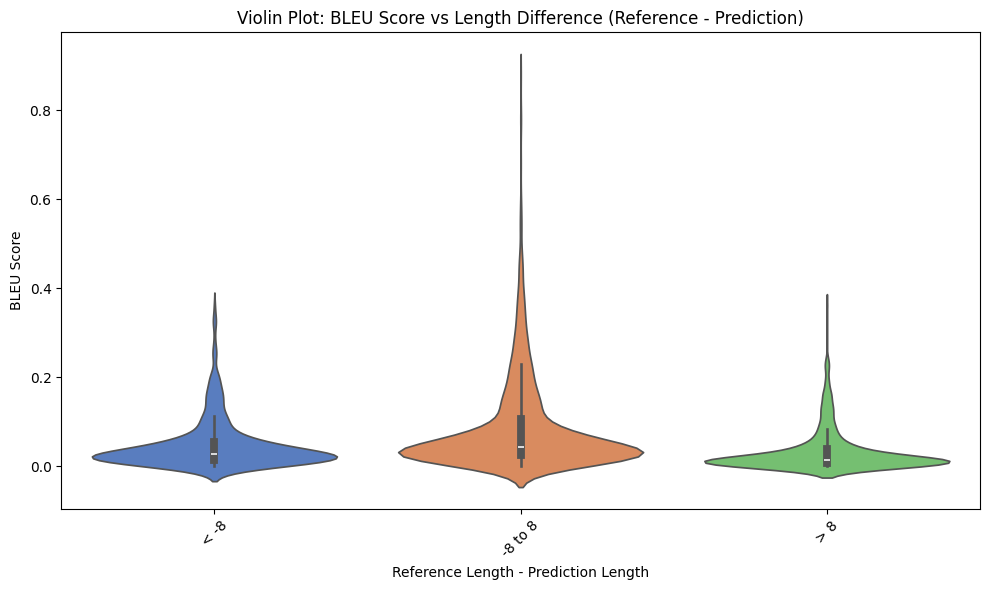

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Categorize the length differences into bins
bins = [-float('inf'), -8, 8, float('inf')]  # Adjusted to make the middle bin from -5 to +5
labels = ['< -8', '-8 to 8', '> 8']  # Updated labels accordingly
data['length_diff_category'] = pd.cut(data['length_diff_ref_pred'], bins=bins, labels=labels)

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='length_diff_category', y='bleu', data=data, palette='muted')

# Set axis labels and title
plt.xlabel('Reference Length - Prediction Length')
plt.ylabel('BLEU Score')
plt.title('Violin Plot: BLEU Score vs Length Difference (Reference - Prediction)')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [50]:
# calculate the correlation between the length difference and the BLEU score
correlation = data['length_diff_ref_pred'].corr(data['bleu'])
print(f"Pearson correlation between length difference and BLEU score: {correlation:.4f}")



Pearson correlation between length difference and BLEU score: -0.1051


File: w2_evaluation_results_beam_search.csv
Mean BLEU: 0.0336, Median BLEU: 0.0119, Std BLEU: 0.0719
Top 2 worst best_predictions:
Source: wir leben in einer dienstleistungswirtschaft.
Prediction: we live in a service economy.
Reference: we live in a service economy.
BLEU: 1.0000

Source: das team-ereignis ist immer am besten.
Prediction: the team event is always the best.
Reference: the team event is always the best.
BLEU: 1.0000

Top 2 worst predictions:
Source: trumps kritiker, unter anderem auch der republikanische präsidentschaftskandidat des jahres 2012 mitt romney, haben bereits verlautbaren lassen, dass seine weigerung fragen in bezug auf vermögen, seine spenden für wohltätige organisationen, sein geschäftsgebaren und verschiedene andere verbindungen aufwirft, insbesondere mit russland.
Prediction: the commission has already explained that its
Reference: trumps critics, including 2012 republican presidential candidate mitt romney and other fellow republicans, have said his refu

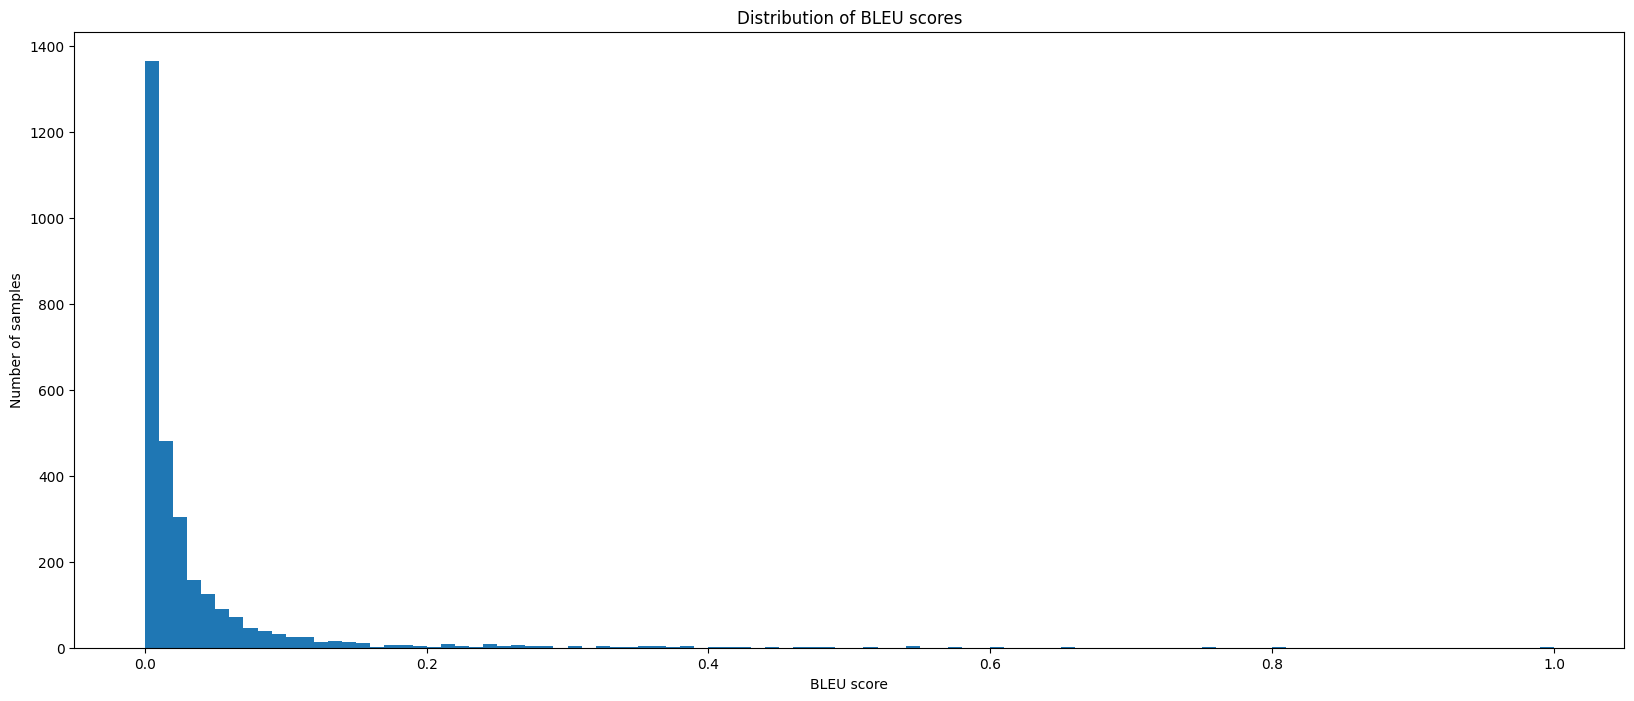

File: w3_evaluation_results_beam_search.csv
Mean BLEU: 0.0368, Median BLEU: 0.0135, Std BLEU: 0.0751
Top 2 worst best_predictions:
Source: wir leben in einer dienstleistungswirtschaft.
Prediction: we live in a service economy.
Reference: we live in a service economy.
BLEU: 1.0000

Source: das team-ereignis ist immer am besten.
Prediction: the team event is always the best.
Reference: the team event is always the best.
BLEU: 1.0000

Top 2 worst predictions:
Source: rudolph w. giuliani, ehemaliger bürgermeister von new york und einer von trumps prominentesten fürsprechern, gab sich große mühe den kandidaten heute in einem cnn-interview vom donnerstag zu verteidigen.
Prediction: rudol wph wph
Reference: rudolph w. giuliani, the former new york city mayor who is one of mr. trumps most prominent surrogates, went to great lengths to defend the candidate in an interview with cnn on thursday.
BLEU: 0.0000

Source: eine twitter-userin erklärte ihre zufriedenheit, dass der rest des internets den

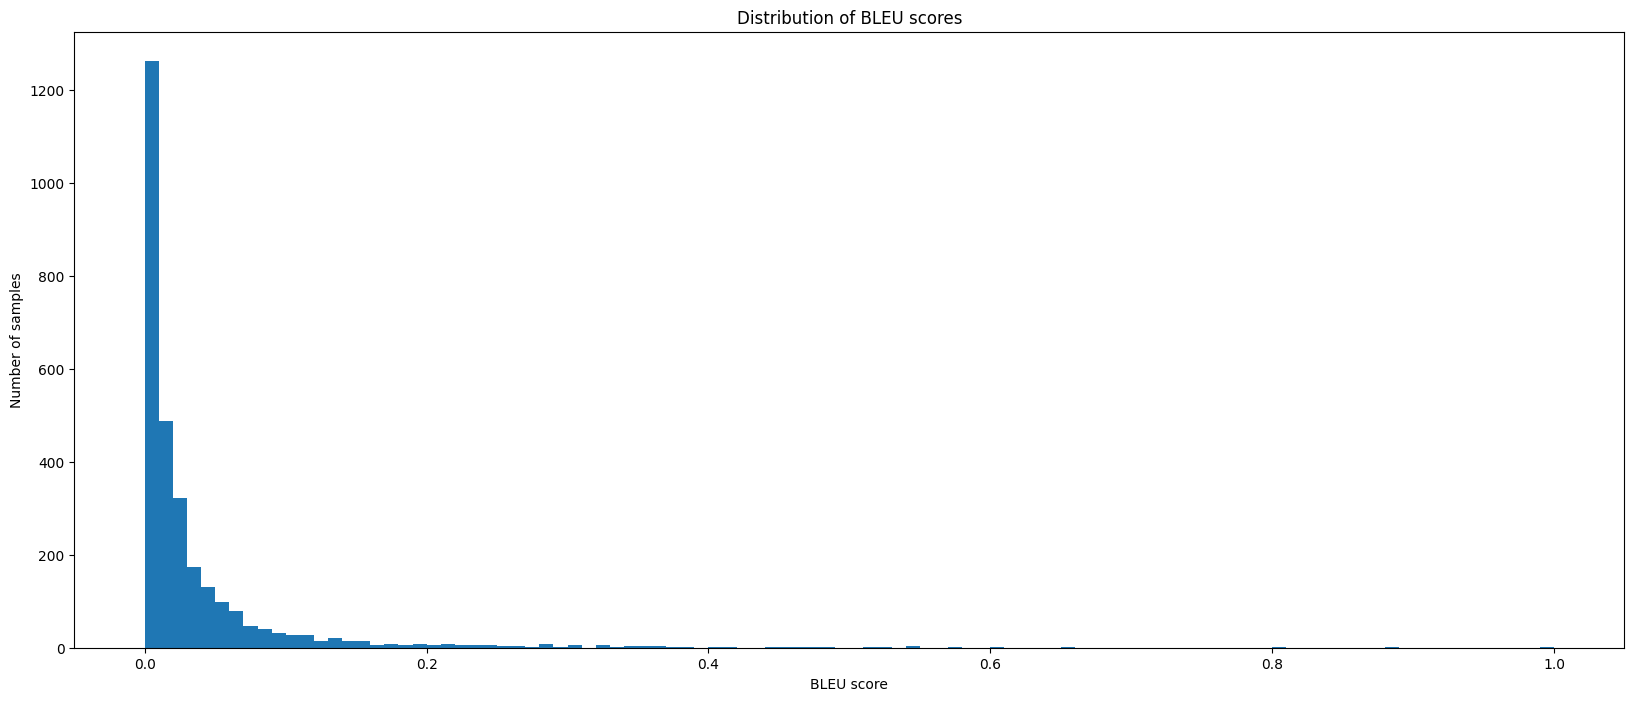

File: w5_evaluation_results_beam_search.csv
Mean BLEU: 0.0387, Median BLEU: 0.0150, Std BLEU: 0.0763
Top 2 worst best_predictions:
Source: das team-ereignis ist immer am besten.
Prediction: the team event is always the best.
Reference: the team event is always the best.
BLEU: 1.0000

Source: wir leben in einer dienstleistungswirtschaft.
Prediction: we live in a service economy.
Reference: we live in a service economy.
BLEU: 1.0000

Top 2 worst predictions:
Source: äthiopiens neuer premierminister, hailemariam desalegn, wurde aus relativ undurchsichtigen gründen ausgewählt, um die stellung von herrn meles einzunehmen.
Prediction: h---lensus
Reference: ethiopias new prime minister, hailemariam desalegn, was plucked from relative obscurity to fill mr. meless shoes.
BLEU: 0.0000

Source: wer seine lunge regelmäßig fordert, gerät auch im alltag nicht so schnell aus der puste.
Prediction: anyone who is calling for his lice
Reference: if you push your lungs to their limits regularly, you will

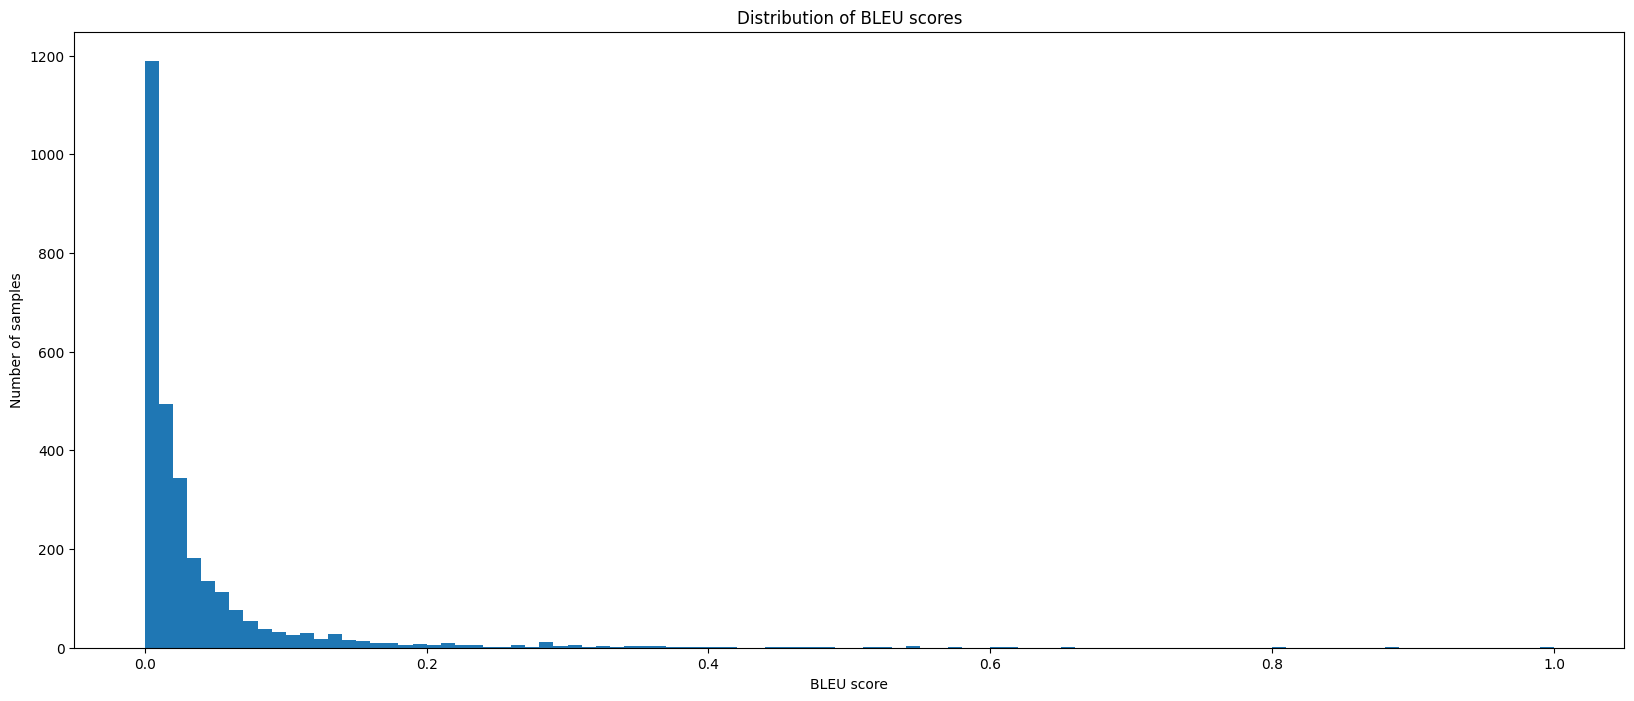

File: w10_evaluation_results_beam_search.csv
Mean BLEU: 0.0402, Median BLEU: 0.0156, Std BLEU: 0.0778
Top 2 worst best_predictions:
Source: das team-ereignis ist immer am besten.
Prediction: the team event is always the best.
Reference: the team event is always the best.
BLEU: 1.0000

Source: wir leben in einer dienstleistungswirtschaft.
Prediction: we live in a service economy.
Reference: we live in a service economy.
BLEU: 1.0000

Top 2 worst predictions:
Source: mr. trump hat sarkasmus bereits zu seiner verteidigung vorgebracht.
Prediction: mr president, mr sark
Reference: mr. trump has used the sarcasm defense before.
BLEU: 0.0000

Source: auch beim 3:2 im probegalopp gegen sampdoria am mittwoch wussten lionel messi und co. noch nicht wirklich zu überzeugen.
Prediction: at the same time, there was no real
Reference: even with 3-2 in a friendly against sampdoria on wednesday, lionel messi and co. were not really all that convincing.
BLEU: 0.0000



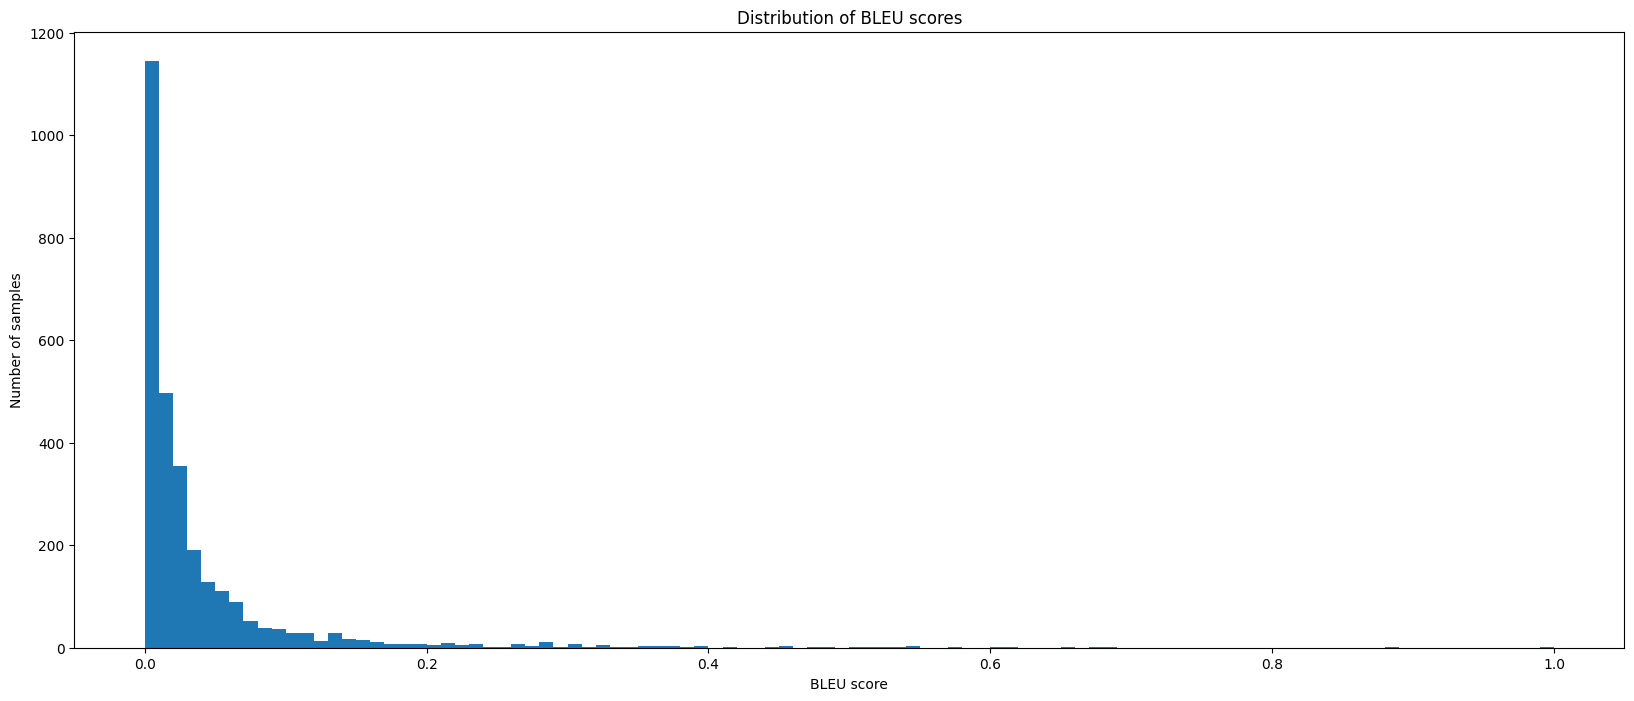

File: w15_evaluation_results_beam_search.csv
Mean BLEU: 0.0410, Median BLEU: 0.0163, Std BLEU: 0.0786
Top 2 worst best_predictions:
Source: das team-ereignis ist immer am besten.
Prediction: the team event is always the best.
Reference: the team event is always the best.
BLEU: 1.0000

Source: wir leben in einer dienstleistungswirtschaft.
Prediction: we live in a service economy.
Reference: we live in a service economy.
BLEU: 1.0000

Top 2 worst predictions:
Source: rupert göller seinerseits lobte wasserwart alfons griebel, der 28 jahre mit ihm zusammengearbeitet habe.
Prediction: the first is that of the first time,
Reference: for his part, rupert göller praised water officer alfons griebel, who had worked alongside him for 28 years.
BLEU: 0.0000

Source: cardiogram, eine app für apple watch, die 35.000 benutzer nachverfolgt, teilte der washington post vor kurzem mit, dass innerhalb von zwei tagen nach markteinführung des spiels, die anzahl der nachverfolgten leute, die jeden tag 30 mi

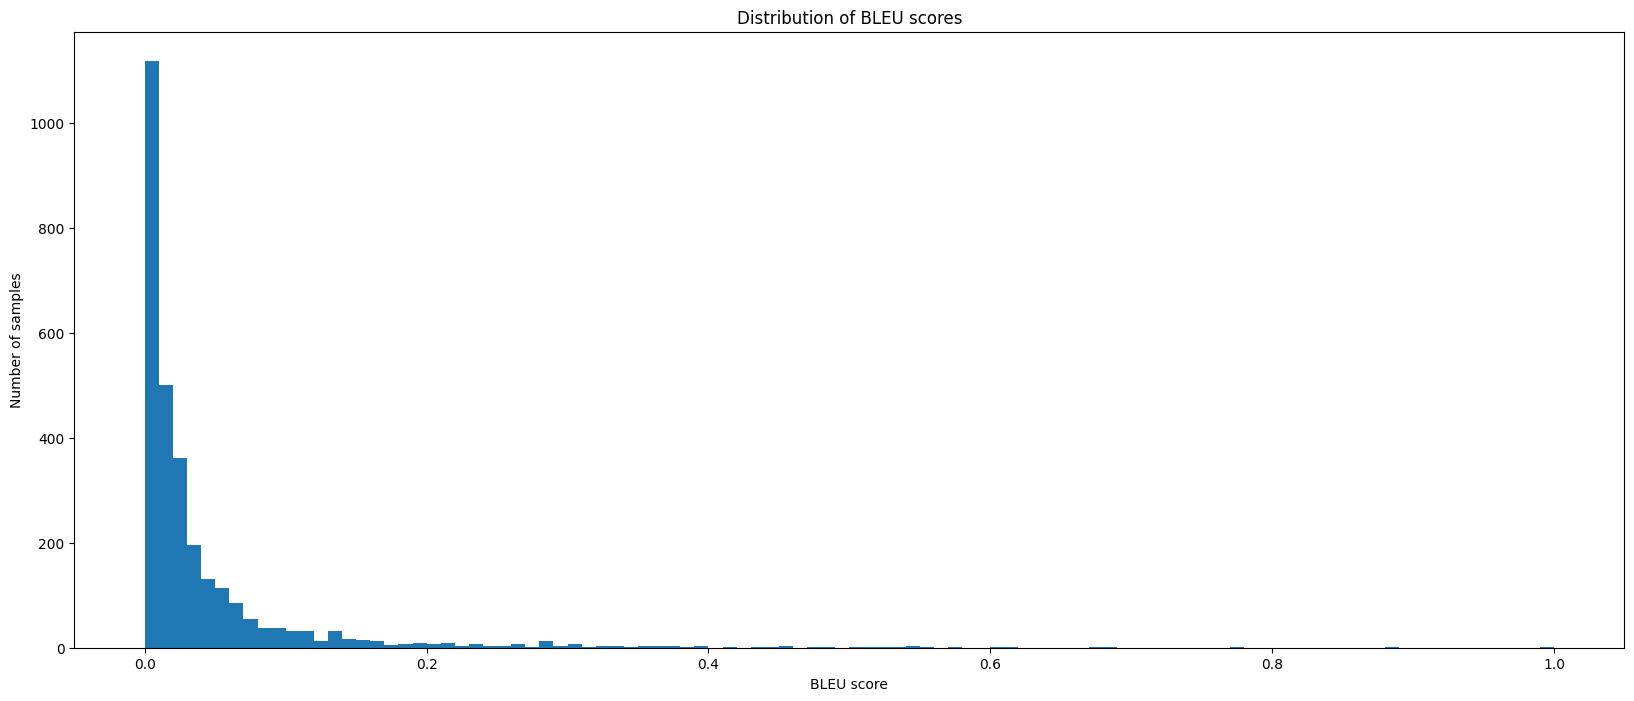

In [51]:
# compare the beam_search averages
# v1 beamsearch impl

evaluations = ["w2", "w3", "w5", "w10", "w15"]
files = [EVALUATION / f"{eval}_evaluation_results_beam_search.csv" for eval in evaluations]



# compare the statistics of the beam search results

def compare_results(files):
    for file in files:
        data = pd.read_csv(file)
        mean_bleu = np.mean(data['bleu'])
        median_bleu = np.median(data['bleu'])
        std_bleu = np.std(data['bleu'])
        data['source_length'] = data['source'].apply(lambda x: len(x.split()))
        data['reference_length'] = data['reference'].apply(lambda x: len(x.split()))
        data['prediction_length'] = data['prediction'].apply(lambda x: len(x.split()))
        print(f"File: {file.name}")
        print(f"Mean BLEU: {mean_bleu:.4f}, Median BLEU: {median_bleu:.4f}, Std BLEU: {std_bleu:.4f}")

        # print the top 10 worst predictions and top 10 best predictions

        worst_predictions = data.sort_values('bleu').head(2)
        best_predictions = data.sort_values('bleu', ascending=False).head(2)

        # only print the source, prediction, reference and bleu score in nice format
        print("Top 2 worst best_predictions:")
        for i, row in best_predictions.iterrows():
            print(f"Source: {row['source']}")
            print(f"Prediction: {row['prediction']}")
            print(f"Reference: {row['reference']}")
            print(f"BLEU: {row['bleu']:.4f}")
            print()

        print("Top 2 worst predictions:")
        for i, row in worst_predictions.iterrows():
            print(f"Source: {row['source']}")
            print(f"Prediction: {row['prediction']}")
            print(f"Reference: {row['reference']}")
            print(f"BLEU: {row['bleu']:.4f}")
            print()

        
        # plot the distribution of the BLEU scores, big plot
        plt.figure(figsize=(20, 8))
        plt.hist(data['bleu'], bins=100)
        plt.xlabel('BLEU score')
        plt.ylabel('Number of samples')
        
        plt.title('Distribution of BLEU scores')
        plt.show()
        
compare_results(files)
    

File: w3_v2_evaluation_results_beam_search.csv
Mean BLEU: 0.0511, Median BLEU: 0.0274, Std BLEU: 0.0583
Top 2 worst best_predictions:
Source: die anschläge am donnerstag und freitag erfolgten wenige tage nach einem umstrittenen referendum über eine von der militärjunta ausgearbeitete verfassung.
Prediction: the attacks on thursday and friday were a few days after a controversial referendum on a constitution drawn up by the military junta. is a constitution that is currently in the case of thursday and friday. is a few days time..
Reference: the attacks on thursday and friday came just a few days after a controversial referendum on a constitution drawn up by the military junta.
BLEU: 0.4778

Source: in paris habe zwar die organisation für wirtschaftliche zusammenarbeit und entwicklung (oecd) ihren hauptsitz, doch diese sei für die finanzbranche weniger bedeutsam als die ezb.
Prediction: in paris, the organisation for economic cooperation and development (o secondly) has its own location

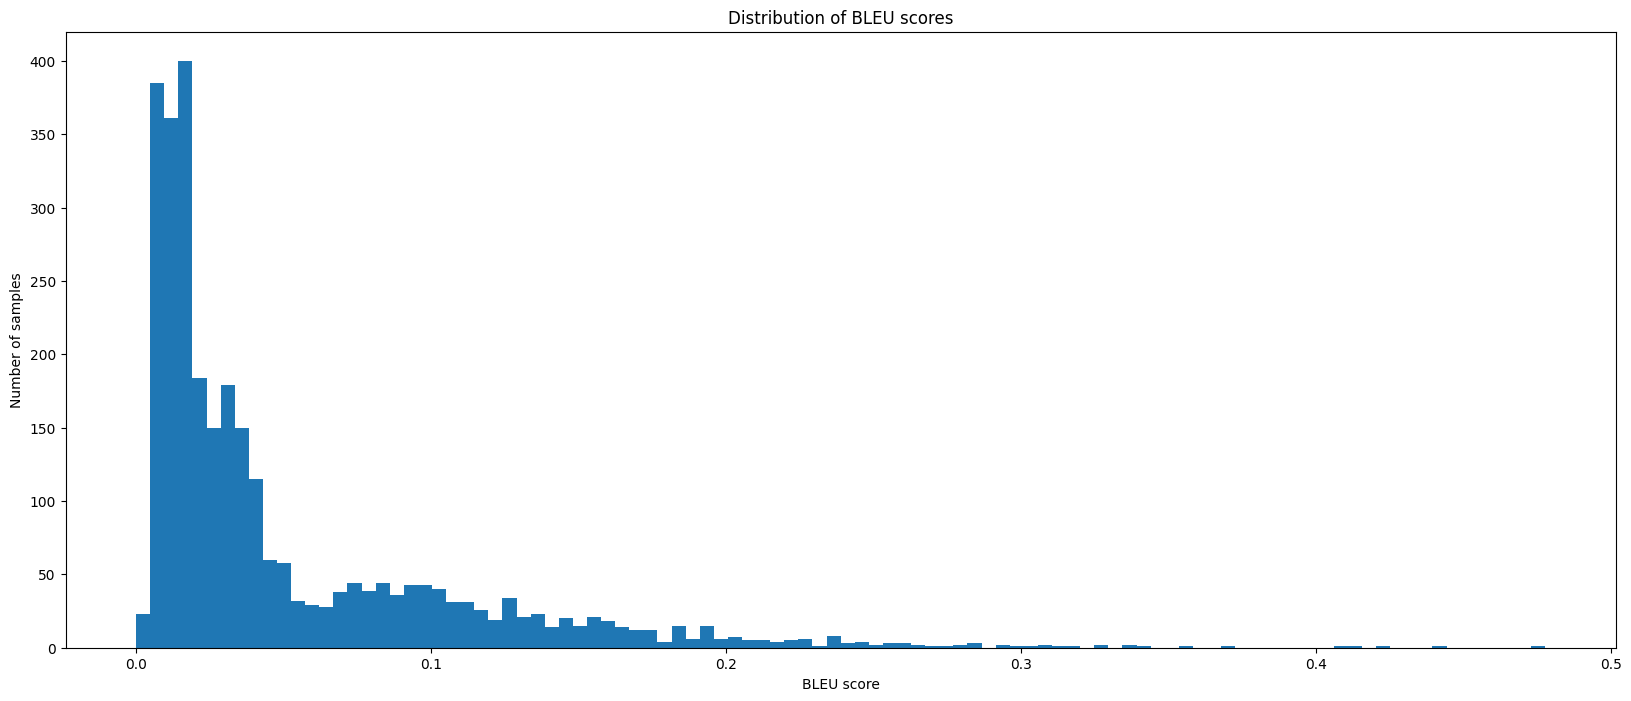

File: w3_v3_evaluation_results_beam_search.csv
Mean BLEU: 0.0689, Median BLEU: 0.0332, Std BLEU: 0.0907
Top 2 worst best_predictions:
Source: aber wenn new york veränderung ist, dann ist es auch neuerfindung.
Prediction: but if new york is change, it is also new-to-date.
Reference: but if new york is change, it is also reinvention.
BLEU: 0.8801

Source: die anschläge am donnerstag und freitag erfolgten wenige tage nach einem umstrittenen referendum über eine von der militärjunta ausgearbeitete verfassung.
Prediction: the attacks on thursday and friday were a few days after a controversial referendum on a constitution drawn up by the military
Reference: the attacks on thursday and friday came just a few days after a controversial referendum on a constitution drawn up by the military junta.
BLEU: 0.7967

Top 2 worst predictions:
Source: der grund war durchaus überzeugend.
Prediction: the reason was very convincing.
Reference: he had been thoroughly convinced.
BLEU: 0.0000

Source: spd-fr

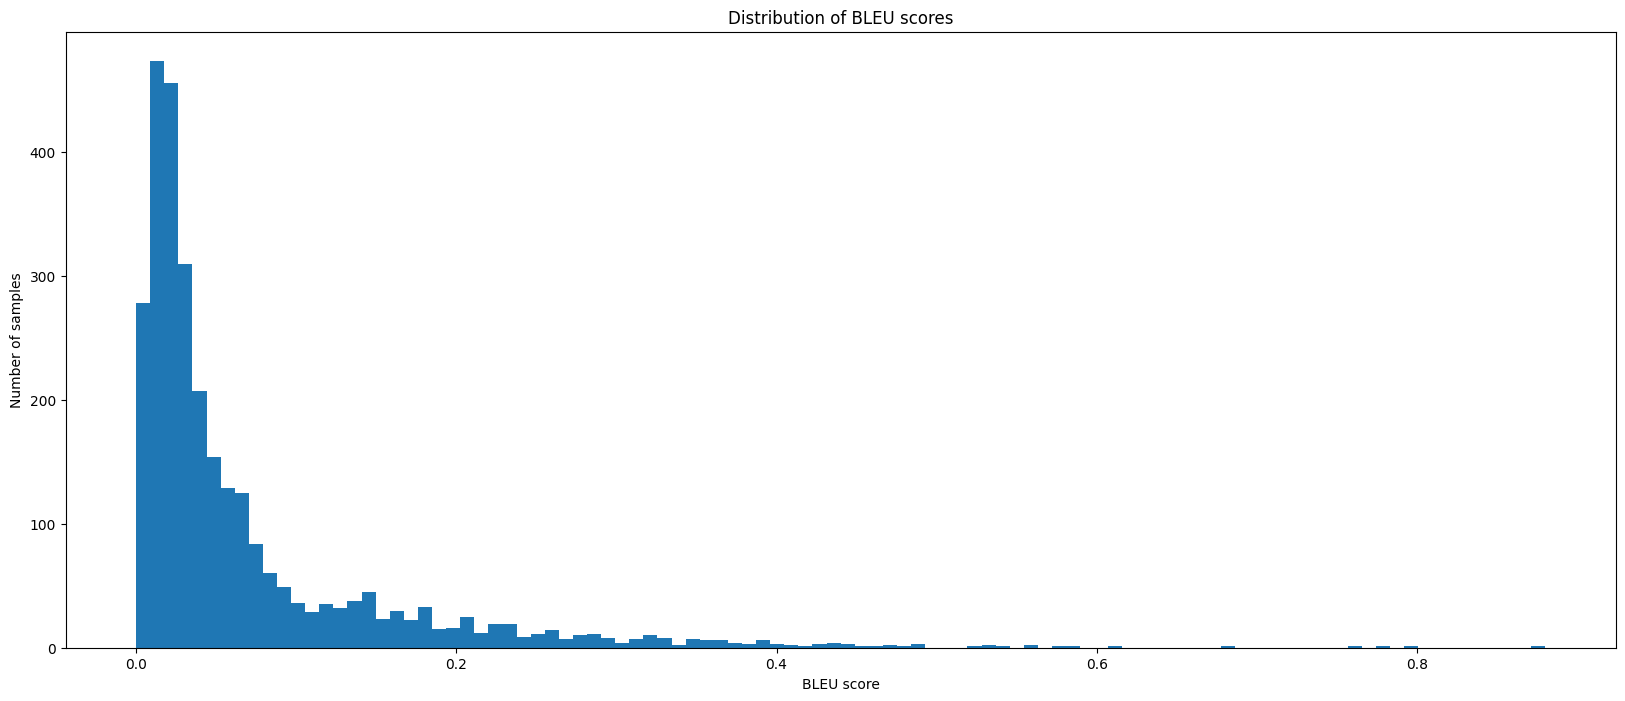

File: w5_v3_evaluation_results_beam_search.csv
Mean BLEU: 0.0688, Median BLEU: 0.0332, Std BLEU: 0.0906
Top 2 worst best_predictions:
Source: aber wenn new york veränderung ist, dann ist es auch neuerfindung.
Prediction: but if new york is change, it is also new-to-date.
Reference: but if new york is change, it is also reinvention.
BLEU: 0.8801

Source: die anschläge am donnerstag und freitag erfolgten wenige tage nach einem umstrittenen referendum über eine von der militärjunta ausgearbeitete verfassung.
Prediction: the attacks on thursday and friday were a few days after a controversial referendum on a constitution drawn up by the military
Reference: the attacks on thursday and friday came just a few days after a controversial referendum on a constitution drawn up by the military junta.
BLEU: 0.7967

Top 2 worst predictions:
Source: es verändert ein wenig den ausblick.
Prediction: there is little change in the direction. is no
Reference: it alters your outlook a bit.
BLEU: 0.0000

So

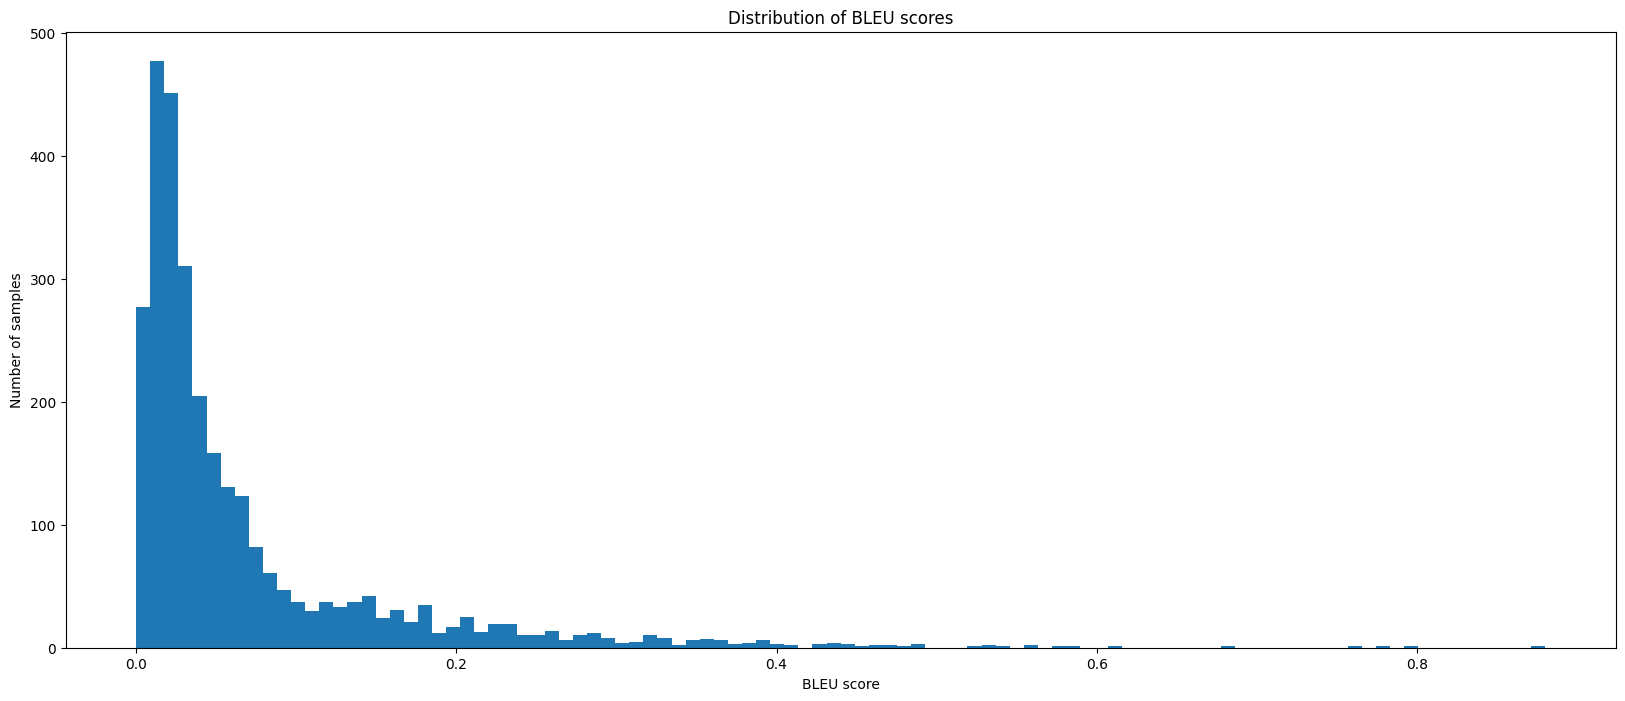

In [52]:
# compare the beam_search averages
# v2,v3 beamsearch impl

evaluations = ["w3_v2", "w3_v3", "w5_v3"]
files = [EVALUATION / f"{eval}_evaluation_results_beam_search.csv" for eval in evaluations]

compare_results(files)